# Práctica 4 Parte III. Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fijamos la semilla para obtener siempre los mismos resultados.

In [9]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [10]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [11]:
data = scale(digits.data)

Mostramos el número de instancias del dataset y el número de descriptores.

In [12]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [19]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [20]:
%%time 
estimator.fit(data)

CPU times: user 552 ms, sys: 186 ms, total: 738 ms
Wall time: 388 ms


KMeans(n_clusters=10)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [21]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos.

In [22]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0   0   0 177   0   0   0   0   1]
Dígito 1: 
[ 0 58  0 96  0  1  0 27  0  0]
Dígito 2: 
[ 7  5  1 38  0 82  0 44  0  0]
Dígito 3: 
[160   0   7   8   0   7   0   1   0   0]
Dígito 4: 
[  0   7   4   2   0   1   9   0   0 158]
Dígito 5: 
[77  4  4 14  0 76  0  0  4  3]
Dígito 6: 
[  0   1   0   4   1   0   0   0 175   0]
Dígito 7: 
[  0   3 152   0   0   6  18   0   0   0]
Dígito 8: 
[44 15  2 99  0 11  0  0  3  0]
Dígito 9: 
[146  19   8   2   0   2   3   0   0   0]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [17]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 888 ms, sys: 347 ms, total: 1.24 s
Wall time: 1.09 s


In [18]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   1   0   0]
Dígito 1: 
[58  0  0 96  0  0 27  0  0  1]
Dígito 2: 
[ 6 78  0 36  0  0 51  0  4  2]
Dígito 3: 
[  0  13   0   8   0   0   2   0 151   9]
Dígito 4: 
[  7   0   0   4   9   0   0 157   0   4]
Dígito 5: 
[ 2 42  0 61  0  3  0  2 70  2]
Dígito 6: 
[  1   0   1   4   0 172   3   0   0   0]
Dígito 7: 
[  3   8   0   0  17   0   0   1   0 150]
Dígito 8: 
[16  8  0 97  0  3  0  0 47  3]
Dígito 9: 
[ 19   0   0   4   3   0   3   0 142   9]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

In [47]:
%%time 
estimator1 = KMeans(n_clusters=10)
estimator1.fit(data)

CPU times: user 1.76 s, sys: 390 ms, total: 2.15 s
Wall time: 1.84 s


In [48]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator2 = KMeans(n_clusters=10)
estimator2.fit(data_r)

CPU times: user 837 ms, sys: 289 ms, total: 1.13 s
Wall time: 915 ms


Con unos pocos tests, pca parece mas rapido pero no en todas las pruebas

***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [24]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.0338938  0.02998218 0.02931999 0.02781802 0.02577053
 0.0227529  0.02227158 0.02165106 0.01913676 0.01775422 0.01637672
 0.01596214 0.01488264]
Varianza total: 79.31140439157602%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [25]:
def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916096681404
Varianza total (2 componentes): 21.59497049807051
Varianza total (3 componentes): 30.039385378081327
Varianza total (4 componentes): 36.53779318835145
Varianza total (5 componentes): 41.397946240668
Varianza total (6 componentes): 45.61205649575996
Varianza total (7 componentes): 49.55021715356002
Varianza total (8 componentes): 52.94224030055307
Varianza total (9 componentes): 55.93812093557017
Varianza total (10 componentes): 58.86918149232545
Varianza total (11 componentes): 61.654298982136524
Varianza total (12 componentes): 64.23076368435359
Varianza total (13 componentes): 66.50482285062809
Varianza total (14 componentes): 68.73198816950018
Varianza total (15 componentes): 70.897087944229
Varianza total (16 componentes): 72.81192089936323
Varianza total (17 componentes): 74.58693618572029
Varianza total (18 componentes): 76.22415909150928
Varianza total (19 componentes): 77.8228863941884
Varianza total (20 componentes): 79.309597

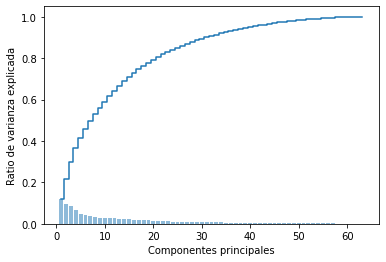

In [26]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

54 componentes

***

## Ejercicio adicional
Recupera los ficheros de la práctica 3 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.


## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.